<a href="https://colab.research.google.com/github/RamiroCabri1/Clustering_b/blob/main/LaboratioCrimenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLUSTERING





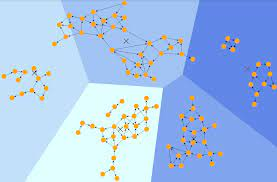

#Librerias

In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import itertools

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploracion

In [76]:
path = r'/content/drive/MyDrive/DataAnalisis/Proyecto3/Crimenes.csv'
df_crimenes = pd.read_csv(path)


In [77]:
df_crimenes

# Es conveniente mirar con la función info, la características de los datos a analizar.
# Es necesario que las variables sean numericas para poder hacer el clustering, en este caso lo son.

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [78]:
df_crimenes.describe()
# La diferencia entre min y max  es muy grande, asi que procedo a normalizar
# Ante de normalizar debo quitar la columna con los nombre de estados.

df_nostates = df_crimenes.drop(["Estado"], axis=1)








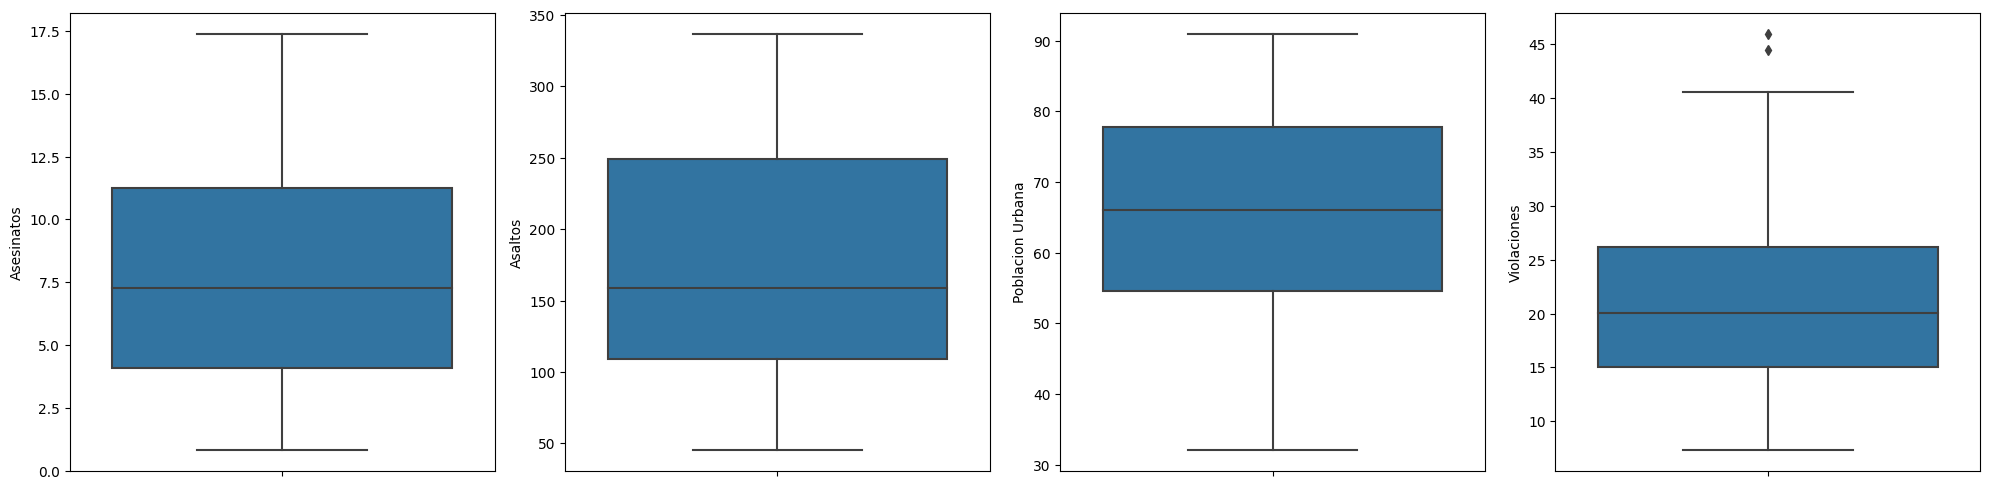

In [79]:
columns = df_nostates.columns
fig, axs = plt.subplots(1, len(columns), figsize=(5*len(columns), 5))

for i, column in enumerate(columns):
    sns.boxplot(y=column, data=df_nostates, ax=axs[i])

plt.tight_layout()
plt.show()

El grafico (BoxPlot) ayuda a ver que existen outliers en la columna "Violaciones".
Observando los mismos, seria conveniente encontrar formas para elimnarlos, así obtener agrupaciones mas robustas.
Estos son algunos métodos para poder determinar si existen outlaires.

1.	Diagramas de caja (Boxplots)
2.	Z-Score:
3.	Desviación estándar
4.	Método del rango intercuartil (IQR)


Cabe destacar que tanto en el df normalizado y el no normalizado los outliers siguen siendo los mismos. En este caso se tomo para graficar los datos aun no normalizados.

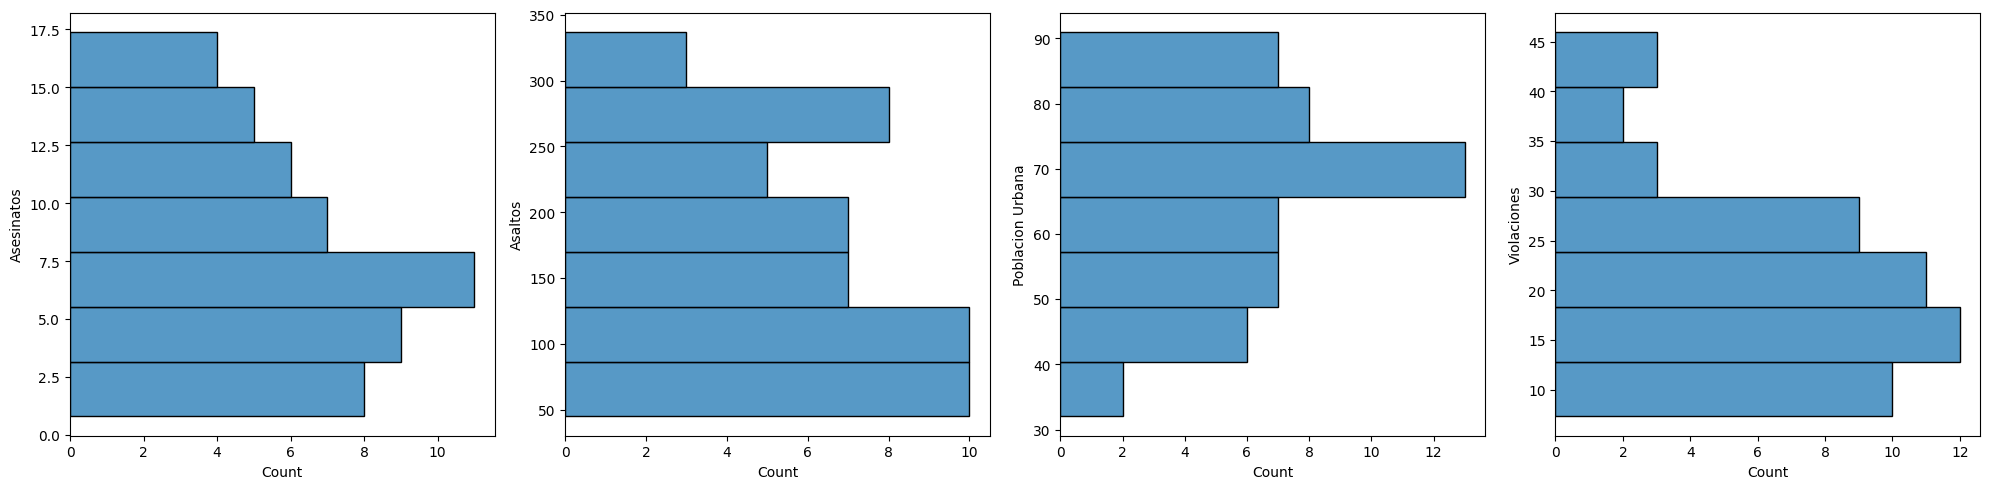

In [80]:
columns = df_nostates.columns
fig, axs = plt.subplots(1, len(columns), figsize=(5*len(columns), 5))

for i, column in enumerate(columns):
    sns.histplot(y=column, data=df_nostates, ax=axs[i])

plt.tight_layout()
plt.show()





En este caso un history plot nos ayuda a poder ver la distribucion de los datos.
Viendo esto vamos a proceder a limpiar de outliers a la columna de "Violaciones".

In [81]:
# Primero buscamos los limites. Utilizamos el maximo promedio como Upper_limit y el minimo promedio como lower_limit.

# Intento utlizar el z - score.

upper_limit = df_nostates["Violaciones"].mean() + 3*df_nostates["Violaciones"].std()
lower_limit = df_nostates["Violaciones"].mean() - 3*df_nostates["Violaciones"].std()
print(upper_limit)
print(lower_limit)



49.33115359317894
-6.867153593178955


Considero que Z Score no va a serme de utilidad para poder descartar Outliners. Ya que como se puede observar el límite máximo supera por bastante el número máximo dado en alguna columna.
Por lo tanto no voy a continuar con ese proceso y voy a utilizar analizar por Inter Cuartiles.


In [82]:

# Cuartiles.

Q1 = df_nostates["Violaciones"].quantile(0.25)
Q3 = df_nostates["Violaciones"].quantile(0.75)
IQR = Q3 - Q1

# Limite basado en los cuartiles.

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)
print(lower_limit)

42.825
-1.5750000000000028


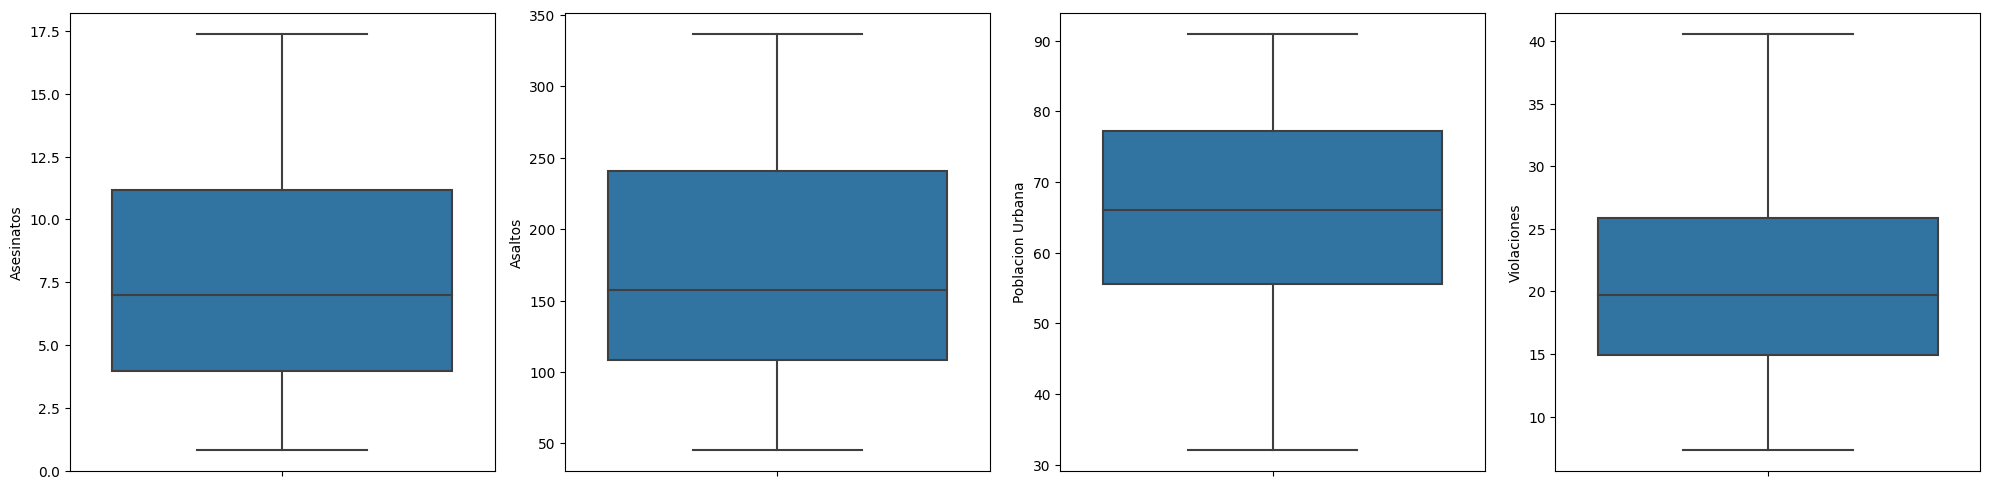

In [83]:
# Nuevo data set sin outliers

# El limite de cuartiles actua como una mascara que elimina los datos que sean superiores a Upper_limit e inferiores a lower_limit.

# Crecion del nuevo dataset.
new_df_nostates = df_nostates.loc[(df_nostates["Violaciones"] >= lower_limit) & (df_nostates["Violaciones"] <= upper_limit)]


fig, axs = plt.subplots(1, len(columns), figsize=(5*len(columns), 5))

for i, column in enumerate(columns):
    sns.boxplot(y=column, data=new_df_nostates, ax=axs[i])

plt.tight_layout()
plt.show()


Se puede ver la diferencia en el grafico de Violaciones. Ahora sun Outliers en "Violaciones".

In [84]:
df_crimenes_norm = (new_df_nostates- new_df_nostates.min())/(new_df_nostates.max() - new_df_nostates.min())

# De esta forma todas las variables tiene un valor maximo 1 y minimo 0.

Proceso a normalizar los datos. De esta forma quedan todos en un rango que va del 0 al 1.
De esta forma K means no toma los valores con montos elevados con desproporción en el análisis; así también se hace mas eficiente el algoritmo y más fácil de interpretar.


Existen 3 grandes grupos de algoritmos para hacer clustering.

Partitioning Clustering: este tipo de algoritmos requieren que el usuario especifique de antemano el número de clusters que se van a crear (K-means, K-medoids, CLARA).

Hierarchical Clustering: este tipo de algoritmos no requieren que el usuario especifique de antemano el número de clusters. (agglomerative clustering, divisive clustering).

Métodos que combinan o modifican los anteriores (hierarchical K-means, fuzzy clustering, model based clustering y density based clustering).

El que voy a seleccionar es: Partitioning Clustering

Determinar el número óptimo de clusters es uno de los pasos más complicados a la hora de aplicar métodos de clustering, sobre todo cuando se trata de partitioning clustering, donde el número se tiene que especificar antes de poder ver los resultados. No existe una forma única de averiguar el número adecuado de clusters, en este caso utilizare la tecnica del Codo.

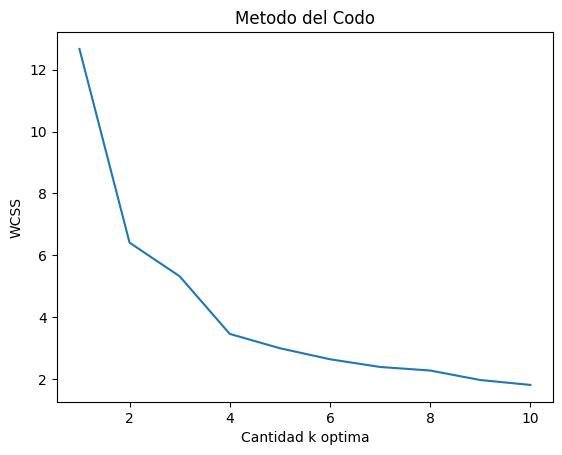

In [85]:
wcss = []

for i in range(1,11):
  Kmeans = KMeans(n_clusters = i, max_iter = 300, n_init='auto' )
  Kmeans.fit(df_crimenes_norm)
  wcss.append(Kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del Codo")
plt.xlabel("Cantidad k optima")
plt.ylabel("WCSS")
plt.show()

Determinar el número óptimo de clústers es uno de los pasos más complicados a la hora de aplicar métodos de clustering, sobre todo cuando se trata de partitioning clustering, donde el número se tiene que especificar antes de poder ver los resultados. No existe una forma única de averiguar el número adecuado de clústeres, en este caso utilizare la técnica del Codo para determinar en qué momento el número de k se encuentra en el codo graficado aquí arriba. Por lo tanto 4 Clústeres es una buena medida para poder separar, ya que luego de haber probado solo 3 clústeres veo que el numero de la inercia obtenida es mucho mayor en 3 que en 4 clústeres. Siempre el nivel de inercia ira bajando cuando se vaya aumentado la cantidad de k, pero en este caso el salto va desde 5 puntos en el modelo con k =3 y una baja significativa a 3.69 si utilizo un k = 4.
Es también muy oportuno poder graficar una visualización con la inercia que posee el modelo en cada caso. Esto también puede ser útil al momento de elegir la cantidad de centroides.

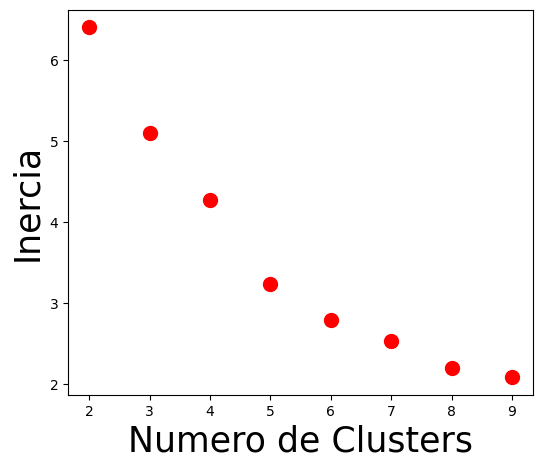

In [86]:
inercia = []

for k in range(2,10):
  kmeans = KMeans(n_clusters = k,  n_init='auto' ).fit(df_crimenes_norm.values)
  inercia.append(kmeans.inertia_)

plt.figure(figsize=(6,5), dpi=100)
plt.scatter(range(2,10), inercia, marker= "o", s = 100, color = "red")
plt.xlabel("Numero de Clusters", fontsize = 25)
plt.ylabel("Inercia", fontsize = 25)
plt.show()


En este gráfico, se puede ver que la inercia es similar al resultado del grafico anterior. La inercia disminuye mientras mas grande es el numero de centroides. La realidad es que estos valores siempre deben considerarse en relación al estudio que se quiere hacer.  

#Modelo

In [87]:
# Creo el modelo con la cantidad de k optima.

modelo_clustering =KMeans (n_clusters= 4, max_iter = 300, random_state=0)

# Entreno el modelo.

modelo_clustering.fit(df_crimenes_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

Una vez encontrado la cantidad de k optima, creamos el objeto KMeans con el k “optimo” y una cantidad de iteraciones de 300, para luego ponerlo a entrenar.

In [88]:
df_crimenes_norm["KMeans Clusters"] = modelo_clustering.labels_

 # En labels_se guardan los resultados del modelo y esto se agrega al dataframe como targets (llamado KMeans Clusters).

df_crimenes_norm.head()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMeans Clusters
0,0.746988,0.654110,0.440678,0.417417,1
2,0.439759,0.852740,0.813559,0.711712,3
3,0.481928,0.496575,0.305085,0.366366,1
4,0.493976,0.791096,1.000000,1.000000,3
5,0.427711,0.544521,0.779661,0.942943,3


#Visualizacion

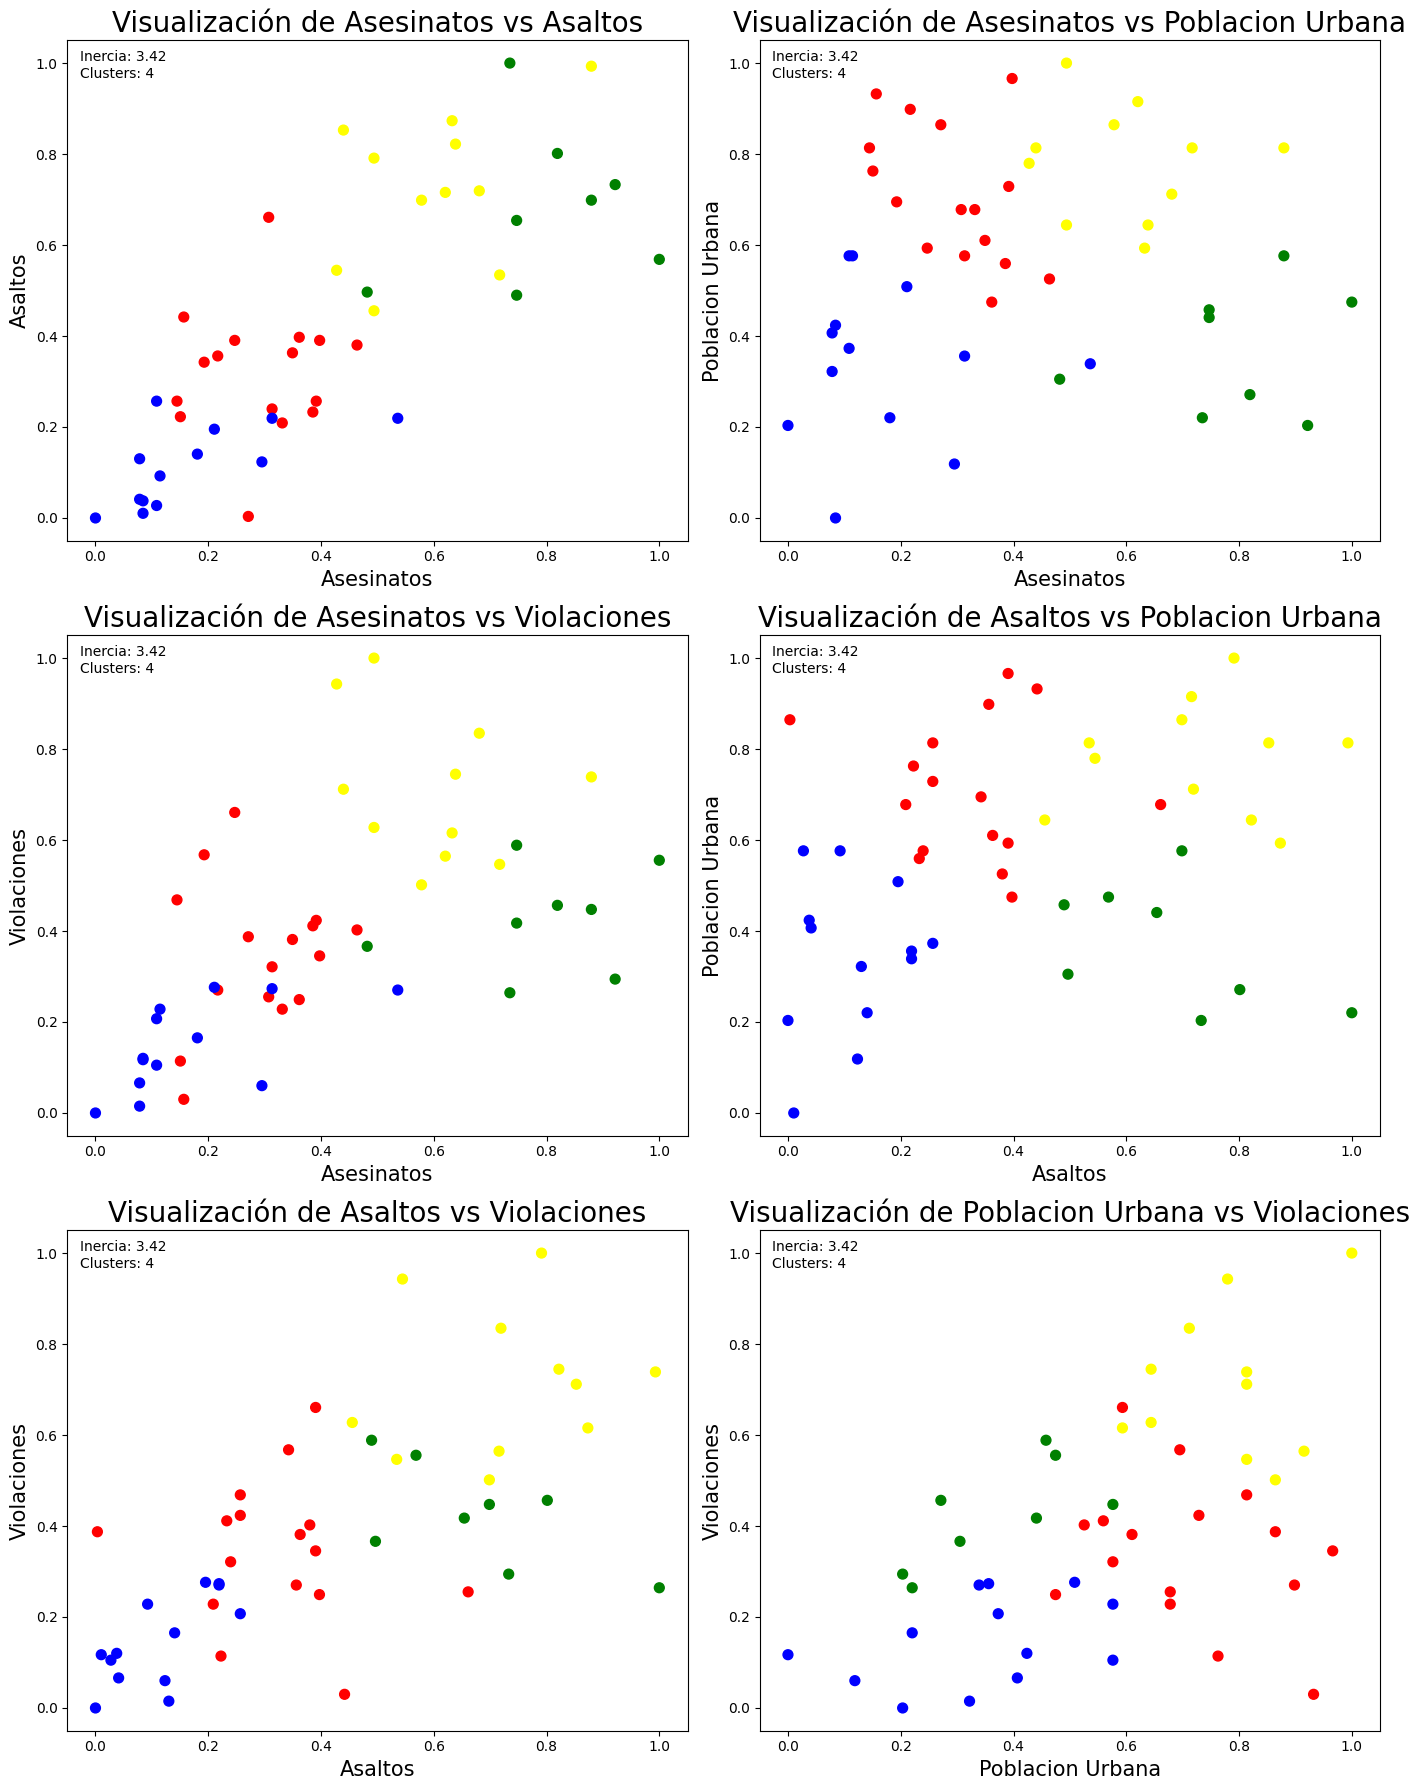

In [89]:


combinaciones = list(itertools.combinations(columns, 2))
n = len(combinaciones)
cols = 2
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 6*rows))

for i, combinacion in enumerate(combinaciones):
    x, y = combinacion
    ax = axs[i//cols, i%cols]
    ax.set_xlabel(x, fontsize = 15)
    ax.set_ylabel(y, fontsize = 15)
    ax.set_title(f"Visualización de {x} vs {y}", fontsize = 20)

    color_theme = np.array(["Blue","Green","Red","Yellow"])
    ax.scatter(x = df_crimenes_norm[x], y = df_crimenes_norm[y], c =  color_theme[df_crimenes_norm["KMeans Clusters"]], s = 50 )

    inertia = modelo_clustering.inertia_
    n_clusters = modelo_clustering.n_clusters

    # Agregar el valor de la inercia y la cantidad de clusters al gráfico
    ax.text(0.02, 0.98, f'Inercia: {inertia:.2f}\nClusters: {n_clusters}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

Acá se puede observar visualmente la separación. Se pueden ver varios outliers ( aun luego de eliminar los valores de "Violaciones" que se presentaban como claros "Outlaiers" ), y combinaciones de como con 4 centroides, los datos se dividen en 4 grupos.
La cantidad de gráficos es innecesaria, pero quería ver en todos los casos.





In [90]:


for crimen in columns:
  fig = px.box(df_crimenes_norm, x="KMeans Clusters", y=crimen)
  fig.show()


En este grafico podemos ver que representa cada Cluster.
Se puede ver que para los distintos delitos: Asaltos, Violaciones y Asesinatos, los crusters 1 y 3 son los de mayor nivel. Es evidente que esto significaría que los pueda catalogar como lugares más peligrosos a los que representan los clusters 0 y 2.


De las 4 categorías puedo identificar las siguientes:

•	Mas seguro: Cluster 2

•	Seguro: Cluster 0

•	Inseguro: Cluster 3

•	Mas Inseguro: Cluster 1




In [91]:
df_crimenes_norm['KMeans Clusters'] = df_crimenes_norm['KMeans Clusters'].replace({0: 'Seguro', 1: 'Mas Inseguro', 2: 'Mas Seguro', 3: 'Inseguro'})
df_crimenes_norm = df_crimenes_norm.merge(df_crimenes[['Estado']], left_index=True, right_index=True)

df_crimenes_norm

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMeans Clusters,Estado
0,0.746988,0.654110,0.440678,0.417417,Mas Inseguro,Alabama
2,0.439759,0.852740,0.813559,0.711712,Inseguro,Arizona
3,0.481928,0.496575,0.305085,0.366366,Mas Inseguro,Arkansas
4,0.493976,0.791096,1.000000,1.000000,Inseguro,California
5,0.427711,0.544521,0.779661,0.942943,Inseguro,Colorado
6,0.150602,0.222603,0.762712,0.114114,Mas Seguro,Connecticut
7,0.307229,0.660959,0.677966,0.255255,Mas Seguro,Delaware
8,0.879518,0.993151,0.813559,0.738739,Inseguro,Florida
9,1.000000,0.568493,0.474576,0.555556,Mas Inseguro,Georgia
10,0.271084,0.003425,0.864407,0.387387,Mas Seguro,Hawaii


Con este código cambiamos los valores numéricos por str con la descripción que interprete.
Por último, voy a hacer un gráfico de EEUU con estas categorías para poder tener una visión más clara.


In [92]:
color_discrete_map = {'Inseguro': 'orange', 'Mas Inseguro': 'red', 'Seguro': 'lightgreen', 'Mas Seguro': 'green'}

# Crear el gráfico
fig = px.choropleth_mapbox(df_crimenes_norm,
                           geojson="https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json",
                           locations='Estado', # nombre de la columna del DataFrame que contiene los nombres de los estados
                           color='KMeans Clusters', # nombre de la columna del DataFrame que contiene las categorías de seguridad
                           color_discrete_map=color_discrete_map,
                           featureidkey="properties.name",
                           center={"lat": 37.0902, "lon": -95.7129},
                           mapbox_style="carto-positron",
                           zoom=3,
                           title="Seguridad en los Estados Unidos")

fig.show()

Como se puede ver la eliminación de datos atípicos, hizo que tanto el estado de Nevada como Alaska no figuren en el mapa.
Porque en estos estados los datos sobre las violaciones eran elevador con respecto al resto.
Por lo tanto volveré a realizar el análisis sin esa eliminación y sin normalizar los datos, para luego comparar los resultados.


In [93]:
df_nostates

new_modelo_clustering =KMeans (n_clusters= 4, max_iter = 300, random_state=0)

# Entreno el modelo.

new_modelo_clustering.fit(df_nostates)

df_nostates["KMeans Clusters"] = new_modelo_clustering.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [94]:
for crimen in columns:
  fig = px.box(df_nostates, x="KMeans Clusters", y=crimen)
  fig.show()

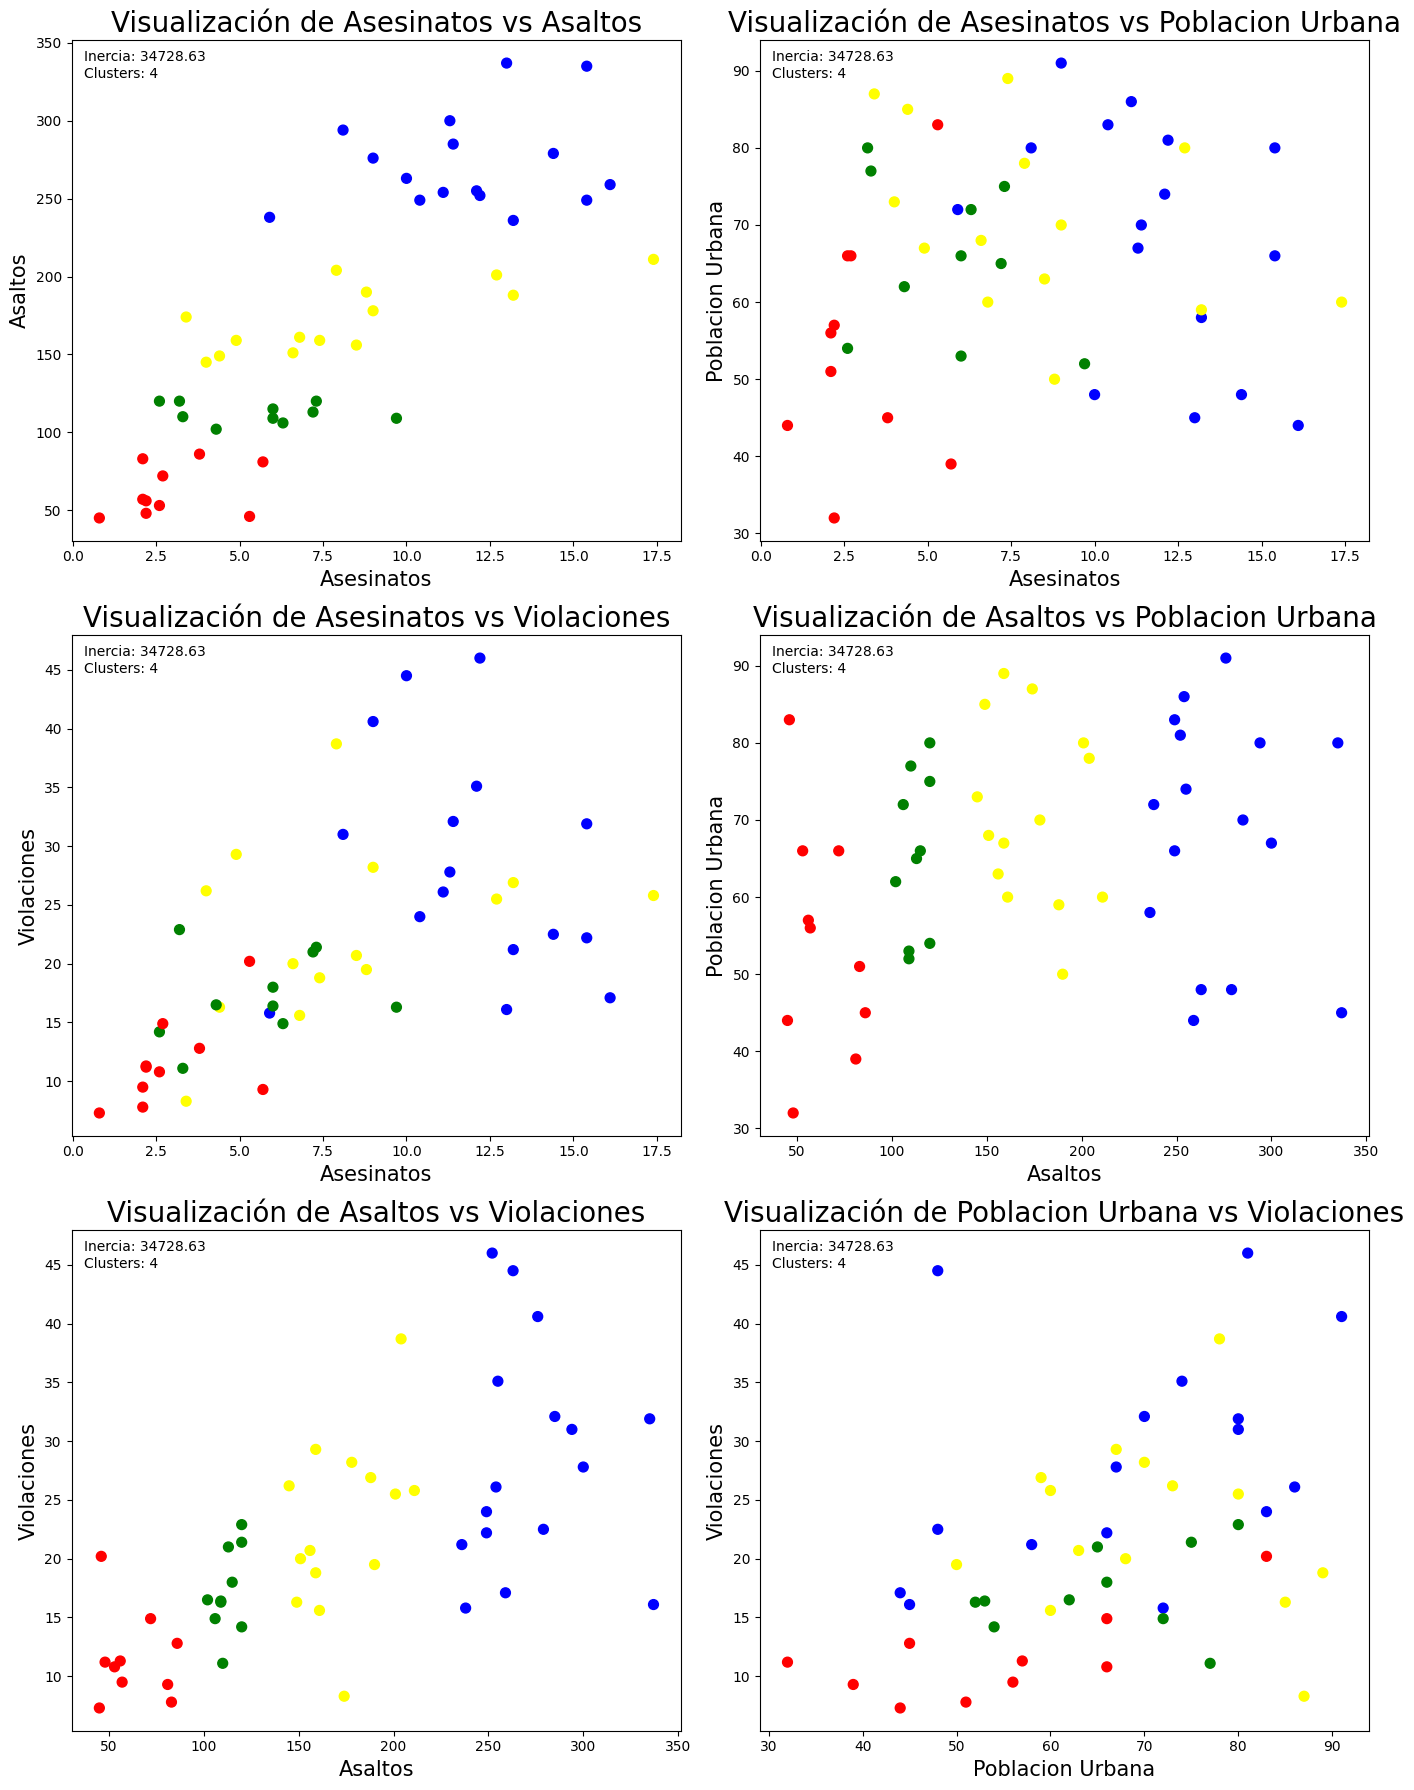

In [95]:
combinaciones = list(itertools.combinations(columns, 2))
n = len(combinaciones)
cols = 2
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(14, 6*rows))

for i, combinacion in enumerate(combinaciones):
    x, y = combinacion
    ax = axs[i//cols, i%cols]
    ax.set_xlabel(x, fontsize = 15)
    ax.set_ylabel(y, fontsize = 15)
    ax.set_title(f"Visualización de {x} vs {y}", fontsize = 20)

    color_theme = np.array(["Blue","Green","Red","Yellow"])
    ax.scatter(x = df_nostates[x], y = df_nostates[y], c =  color_theme[df_nostates["KMeans Clusters"]], s = 50 )

    inertia = new_modelo_clustering.inertia_
    n_clusters = new_modelo_clustering.n_clusters

    # Agregar el valor de la inercia y la cantidad de clusters al gráfico
    ax.text(0.02, 0.98, f'Inercia: {inertia:.2f}\nClusters: {n_clusters}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [96]:
df_nostates['KMeans Clusters'] = df_nostates['KMeans Clusters'].replace({0: 'Seguro', 1: 'Mas Inseguro', 2: 'Mas Seguro', 3: 'Inseguro'})
df_nostates = df_nostates.merge(df_crimenes[['Estado']], left_index=True, right_index=True)
df_nostates.head()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMeans Clusters,Estado
0,13.2,236,58,21.2,Seguro,Alabama
1,10.0,263,48,44.5,Seguro,Alaska
2,8.1,294,80,31.0,Seguro,Arizona
3,8.8,190,50,19.5,Inseguro,Arkansas
4,9.0,276,91,40.6,Seguro,California


In [97]:
color_discrete_map = {'Inseguro': 'orange', 'Mas Inseguro': 'red', 'Seguro': 'lightgreen', 'Mas Seguro': 'green'}

# Crear el gráfico
fig = px.choropleth_mapbox(df_nostates,
                           geojson="https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json",
                           locations='Estado', # nombre de la columna del DataFrame que contiene los nombres de los estados
                           color='KMeans Clusters', # nombre de la columna del DataFrame que contiene las categorías de seguridad
                           color_discrete_map=color_discrete_map,
                           featureidkey="properties.name",
                           center={"lat": 37.0902, "lon": -95.7129},
                           mapbox_style="carto-positron",
                           zoom=3,
                           title="Seguridad en los Estados Unidos")

fig.show()


Sin la normalización y sin la eliminación de algunos atípicos en “Violaciones” que fue donde mas encontré, los resultados son contraintuitivos y no reflejan la realidad de EEUU, donde los estados mas ricos por PBI per cápita suelen tener mayores niveles de seguridad, estos se encuentran en las zonas de lo que se denomina “Nueva Inglaterra”.
Este último grafico casi que invierte (a excepción de la zona de “Nueva Inglaterra”) la relación. La zona norte de EEUU es la que mayormente concentra los mayores niveles de seguridad y la zona sur, suele encontrar las tasas más elevadas de delitos. Lugares como:


•	Luisiana: Tiene la séptima tasa de delitos violentos más alta.


•	Missouri: Tiene la octava tasa de delitos violentos más alta.


•	Arizona: Tiene la sexta tasa de delitos violentos más alta.


•	Arkansas: Tiene la quinta tasa de delitos violentos más alta.


•	Tennessee: Tiene la cuarta tasa de delitos violentos más alta.


•	Nuevo México: Tiene la tercera tasa de delitos violentos más alta.


El primer grafico que realice mostraba esta realidad y era notoria una división entre estados sureños mas inseguros y norteños mas seguros. Realidad a la que no se adapta este último análisis.
